K-means clustering model to group this data and identify patterns that provide important insights about penguins

# Imports 

In [1]:
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

<ipython-input-1-c4ba1f328ce8>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
penguins = pd.read_csv("penguins.csv")

In [3]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


# EDA

In [4]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
penguins["species"].value_counts(dropna=False)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)

In [8]:
penguins_subset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


In [10]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

In [11]:
penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns = ["sex"])

In [12]:
penguins_subset = penguins_subset.drop(["island"], axis =1) 

In [13]:
x = penguins_subset.drop(["species"], axis=1)

In [14]:
x_scaled = StandardScaler().fit_transform(x)

# Data Modeling

In [19]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [20]:
inertia = kmeans_inertia (num_clusters, x_scaled)
inertia

[885.6224143652253,
 578.8284278107237,
 477.2295673528196,
 284.5464837898291,
 218.05156297830223,
 201.51585567445807,
 196.58908645819528,
 180.65751845628574,
 170.157035897555]

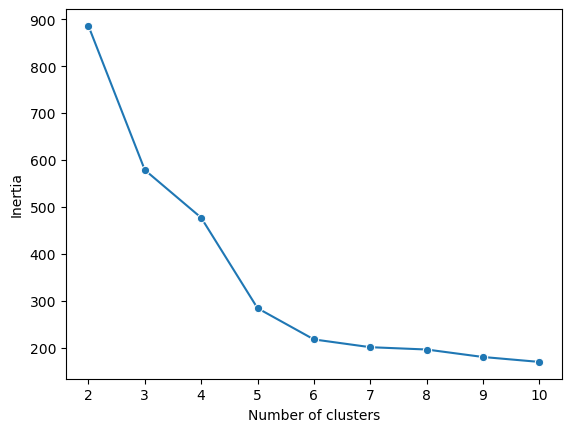

In [21]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

# Results and Evaluation

In [22]:
def kmeans_sil (num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score( x_vals, kms.labels_))
        
    return sil_score

sil_score = kmeans_sil(num_clusters, x_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188375,
 0.4489699212061028,
 0.5199985748608681,
 0.5223086008347771,
 0.47386350642293157,
 0.4715443426463867,
 0.4160561489496056,
 0.4183063433691049]

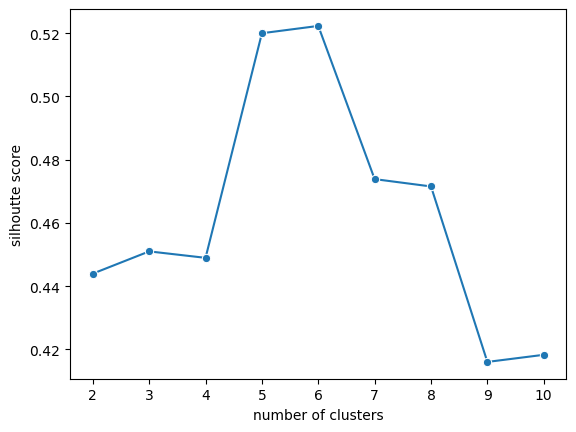

In [23]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("number of clusters");
plot.set_ylabel("silhoutte score");

In [24]:
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(x_scaled)

KMeans(n_clusters=6, random_state=42)

In [25]:
print("unique labels:", np.unique(kmeans6.labels_))

unique labels: [0 1 2 3 4 5]


In [26]:
penguins_subset["clusters"] = kmeans6.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,clusters
0,Adelie,39.1,18.7,181.0,3750.0,True,5
1,Adelie,39.5,17.4,186.0,3800.0,False,2
2,Adelie,40.3,18.0,195.0,3250.0,False,2
3,Adelie,36.7,19.3,193.0,3450.0,False,2
4,Adelie,39.3,20.6,190.0,3650.0,True,5


In [27]:
penguins_subset.groupby(by=["clusters", "species"]).size()

clusters  species  
0         Chinstrap    32
1         Gentoo       58
2         Adelie       73
          Chinstrap     2
3         Adelie        2
          Chinstrap    34
4         Gentoo       61
5         Adelie       71
dtype: int64

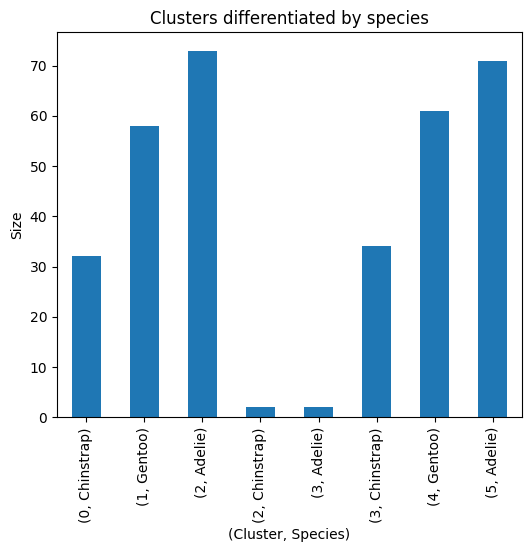

In [28]:
penguins_subset.groupby(by=['clusters', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [29]:
penguins_subset.groupby(by=["clusters","species","sex_MALE"]).size().sort_values(ascending=False)

clusters  species    sex_MALE
2         Adelie     False       73
5         Adelie     True        71
4         Gentoo     True        61
1         Gentoo     False       58
3         Chinstrap  True        34
0         Chinstrap  False       32
2         Chinstrap  False        2
3         Adelie     True         2
dtype: int64

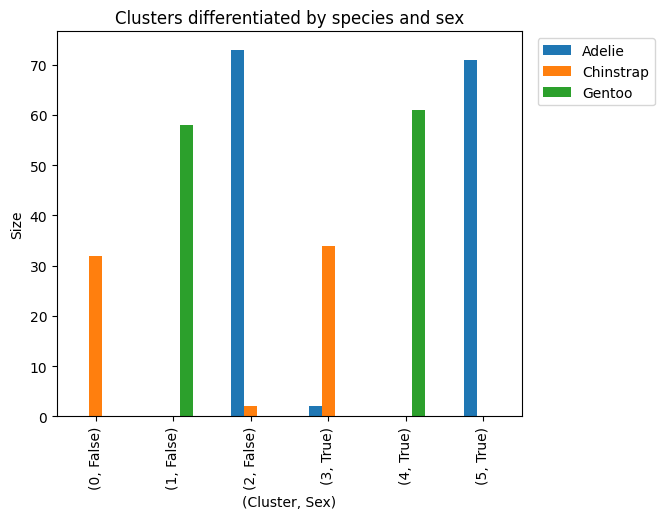

In [30]:
penguins_subset.groupby(by=['clusters','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))